In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [122]:
n_pts = 500
# nested list for center of each of the 3 clusters
centers = [[-1, 1], [-1, -1], [1, -1]]
# create data points with corresponding label, labels correspond to 0, 1, and 2 representing the 3 mutually exclusive classes of different center coordinates
X, y = datasets.make_blobs(n_pts, random_state = 123, centers = centers, cluster_std = 0.4)


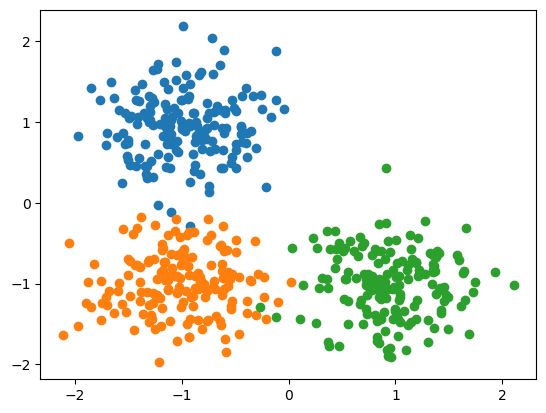

In [123]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [124]:
print(y)
# hot encode labels to eliminate unecessary dependencies within data labels -> doesnt create unjustified relationships with data labels
# 2nd arguament: 3 = number of data classes
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [125]:
model = Sequential()
# sigmoid wont work use softmax, model with 3 output nodes 2 input nodes
model.add(Dense(units = 3, input_shape = (2,), activation = 'softmax'))
# run adam model with learning rate of 0.1 and cross entropy error function
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

c:\Users\44780\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
# train model
h = model.fit(x=X, y=y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2734 - loss: 1.3413  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9695 - loss: 0.3743 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9928 - loss: 0.1488 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9818 - loss: 0.1070 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9863 - loss: 0.0865 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9898 - loss: 0.0694 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9894 - loss: 0.0638 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9943 - loss: 0.0545 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9860 - loss: 0.0644 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.0656 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0530 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Text(0.5, 1.0, 'accuracy')

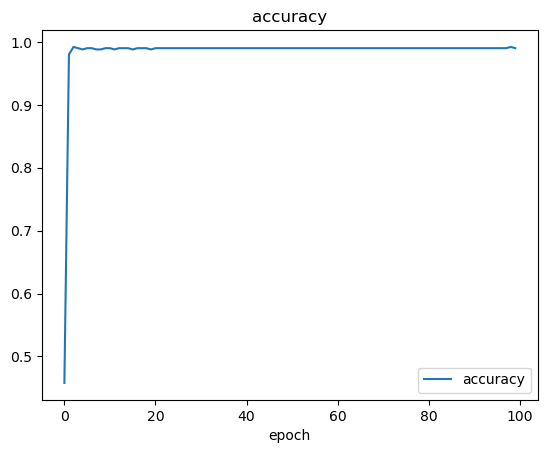

In [127]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

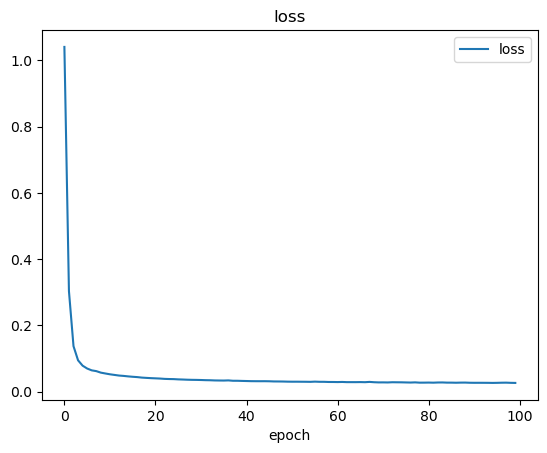

In [128]:
# plot loss function results
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [129]:
# function to plot output where X is the dataset, y is the labelled matrix data, and model is the sequential model
# correlates each specific coordinate with its respecitve preduction probability and plots contour zones 
# yellow = 1 purple = 0 
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    # return coordinate matricies from the input of the coordinate vectors
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    pred_function = np.argmax(pred_func, axis = 1)
    Z = pred_function.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


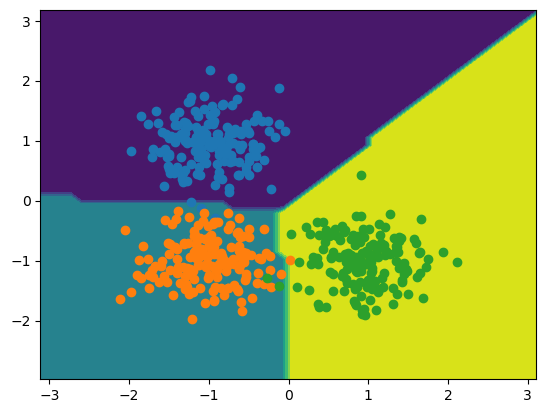

In [130]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1], label = 'Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label = 'Class 1')
plt.scatter(X[y==2, 0], X[y==2, 1], label = 'Class 2')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: [0]


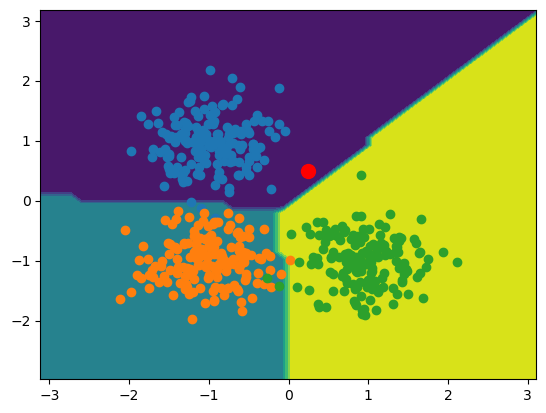

In [131]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
x = 0.25
y = 0.5
point_array = np.array([[x,y]])
prediction = model.predict(point_array)
predicted_class = np.argmax(prediction, axis = 1)
print('Predicted Class:', predicted_class)
plt.plot([x],[y], marker = 'o', markersize = 10, color = 'r')
plt.show()